# Data Analyst Skills Analysis

This dataset was created by user picklesueat and it contains details on ~2,200 data analyst job postings from Glassdoor. This notebook will attempt to answer a popular question regarding breaking into the data analysis field: "Which skills are the most important for aspiring data analysts to learn?" We will also touch on some adjacent issues, such as the relationship between a data analyst's skill set and other factors such as salary or role seniority.

## 1. Data exploration

First we will perform some basic data cleaning. Since most of it was done already in a different notebook, the explanations will be omitted for conciseness. The most important item to note is that an average salary column was computed in order to aid our analysis of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jobs=pd.read_csv("H:\Random files\Data analyst\data analyst job postings\da_job_postings.csv")
jobs.head(1)

,Unnamed: 0.1,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE


In [3]:
jobs.drop(["Unnamed: 0"], axis=1, inplace=True)
jobs.drop(["Unnamed: 0.1"], axis=1, inplace=True)

In [4]:
jobs=jobs.replace(-1,np.nan)
jobs=jobs.replace(-1.0,np.nan)
jobs=jobs.replace("-1",np.nan)
jobs=jobs.replace("-1.0",np.nan)

In [5]:
jobs.loc[:,"Minimum salary"]=jobs.loc[:,"Salary Estimate"].str.split().str[0].str.split(pat="-", expand=True).loc[:,0].str.strip("$").str.strip("K").astype(float)
jobs.loc[:,"Maximum salary"]=jobs.loc[:,"Salary Estimate"].str.split().str[0].str.split(pat="-", expand=True).loc[:,1].str.strip("$").str.strip("K").astype(float)
jobs.loc[:,"Average salary"]=(jobs.loc[:,"Minimum salary"]+jobs.loc[:,"Maximum salary"])/2

In [6]:
jobs.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimum salary,Maximum salary,Average salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,TRUE,37.0,66.0,51.5


## 2. Skills analysis

We can start by tackling a simple question: what are the most common skills required to be a data analyst? To answer this question, we can simply count mentions of each skill in the job descriptions column. We need to be particularly careful with certain skills like R which can obviously be found in regular words, so we use regex to ensure that we only match the coding language. For clarity, we will categorize skills into three types: coding, data visualization, and machine learning. Most data analysis skills can be placed into one of these buckets. We split skills up by category for clarity as we can not only compare the importance of skills in general, but also the type of skill; are data visualization skills more or less important than knowing how to code?

In [7]:
jobs["Job Description"]=jobs["Job Description"].str.lower()

In [8]:
coding_skills=["sql","python",r"\br\b","sas","vba","excel","pandas","numpy"]
coding_skill_counts={}

for s in coding_skills:
    coding_skill_counts[s]=jobs["Job Description"].str.contains(s).sum()
coding_skill_counts["r"]=coding_skill_counts.pop(r"\br\b")
coding_skill_counts=dict(sorted(coding_skill_counts.items(), key=lambda item: item[1], reverse=True))

print(coding_skill_counts)

{'sql': 1389, 'excel': 1354, 'python': 637, 'r': 441, 'sas': 411, 'vba': 61, 'pandas': 41, 'numpy': 23}


In [9]:
viz_skills=[r"\bbi\b|visuali[sz]ation|business intelligence","powerbi","tableau","qlik","looker","matplotlib","seaborn"]
viz_skill_counts={}

for s in viz_skills:
    viz_skill_counts[s]=jobs["Job Description"].str.contains(s).sum()
viz_skill_counts["bi"]=viz_skill_counts.pop(r"\bbi\b|visuali[sz]ation|business intelligence")
viz_skill_counts=dict(sorted(viz_skill_counts.items(), key=lambda item: item[1], reverse=True))

print(viz_skill_counts)

{'bi': 884, 'tableau': 620, 'looker': 108, 'powerbi': 78, 'qlik': 76, 'matplotlib': 11, 'seaborn': 4}


In [10]:
ml_skills=[r"machine learning|\bml\b","tensorflow","pytorch","scikit"]
ml_skill_counts={}

for s in ml_skills:
    ml_skill_counts[s]=jobs["Job Description"].str.contains(s).sum()
ml_skill_counts["ml"]=ml_skill_counts.pop(r"machine learning|\bml\b")
ml_skill_counts=dict(sorted(ml_skill_counts.items(), key=lambda item: item[1], reverse=True))

print(ml_skill_counts)

{'ml': 192, 'scikit': 17, 'tensorflow': 5, 'pytorch': 1}


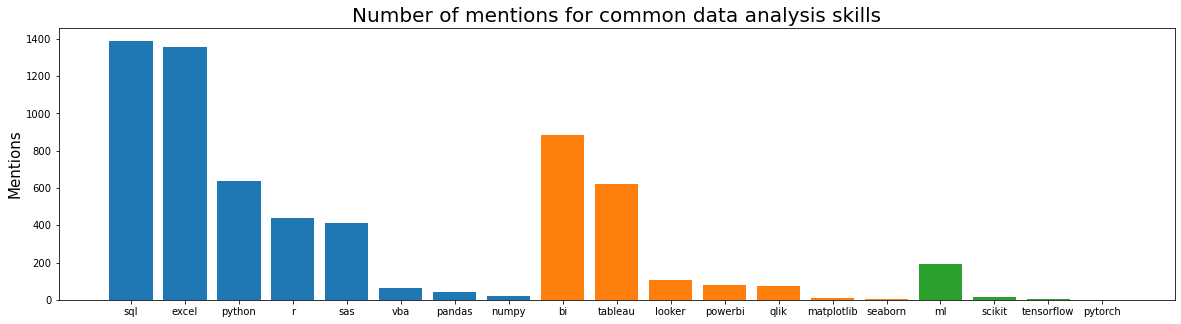

In [11]:
plt.figure(figsize=(20,5))
plt.bar(coding_skill_counts.keys(),coding_skill_counts.values())
plt.bar(viz_skill_counts.keys(),viz_skill_counts.values())
plt.bar(ml_skill_counts.keys(),ml_skill_counts.values())
plt.ylabel("Mentions",fontsize=15)
plt.title("Number of mentions for common data analysis skills", fontsize=20)
plt.show()

From our graph we can see that coding skills are the most in demand. SQL and Excel skills are by far the most desired, which makes sense given that they are the most foundational skills used in data analysis (even though Excel isn't a coding language, it fits with this group the best). Out of Python and R, the two most common "advanced" programming languages, Python is more common by a fair margin. SAS is also quite common, although it can be viewed as a complement to SQL, a fairly similar skill. VBA seems to be fairly rare, as data analysts will typically use less Excel and more SQL/Python/R. The most popular Python data analysis libraries in pandas and numpy were also very rare, although they may be expected of analysts who consider themselves well-versed in Python.

After SQL and Excel, data visualization is the next most sought-after skill, with Tableau being the most popular software by a large margin. Other popular software cohices include Looker and PowerBI, with Python libraries like matplotlib and seaborn perhaps being more common with data scientists.

Finally, machine learning tends to be a skill that does not show up too much in data analyst job postings, which makes sense as typically it is a skill more commonly held by data scientists.

## 3. Relationship between skillset and salary

Next we will examine the relationship between the skills required by a job posting and the amount of salary one might expect to earn. For the purposes the analysis we will only show skills with a reasonably larger sample size, as listed below.

In [12]:
skills=["sql","python",r"\br\b","sas","excel",r"\bbi\b|visuali[sz]ation|business intelligence","tableau",r"machine learning|\bml\b"]

skill_salary={}
for s in skills:
    jobs[s]=jobs["Job Description"].str.contains(s)
    skill_salary[s]=[jobs.loc[jobs[s], "Average salary"].mean(), jobs.loc[jobs[s]==False, "Average salary"].mean()]

regex_to_replace=[r"\br\b", r"\bbi\b|visuali[sz]ation|business intelligence", r"machine learning|\bml\b"]
regex_replacement=["r","bi","ml"]
for rtr, rr in zip(regex_to_replace, regex_replacement):
    skill_salary[rr]=skill_salary.pop(rtr)

skill_salary=dict(sorted(skill_salary.items(), key=lambda item: item[1][0], reverse=True))

print(skill_salary)

{'python': [74.73390894819467, 71.09318885448917], 'tableau': [74.24354838709678, 71.31740196078431], 'ml': [74.16145833333333, 71.93300970873787], 'r': [73.36961451247166, 71.81943677526229], 'sql': [71.79646974063401, 72.64756944444444], 'excel': [71.66666666666667, 72.80978865406007], 'bi': [71.40214932126698, 72.58881578947368], 'sas': [69.47323600973236, 72.71455730581206]}


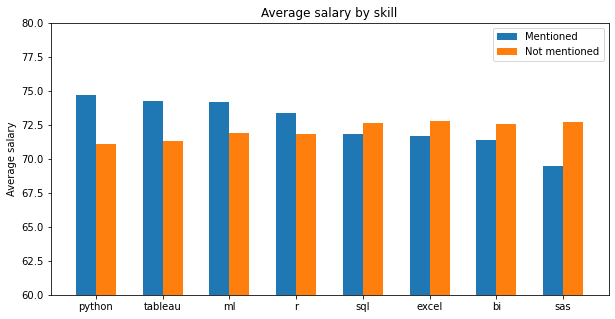

In [13]:
x=np.arange(len(skills))

plt.figure(figsize=(10,5))
plt.bar(x-0.15, [i[0] for i in skill_salary.values()], width=0.3, label="Mentioned")
plt.bar(x+0.15, [i[1] for i in skill_salary.values()], width=0.3, label="Not mentioned")
plt.xticks(x, skill_salary.keys())
plt.ylim(60,80)
plt.legend()
plt.title("Average salary by skill")
plt.ylabel("Average salary")
plt.show()

From this graph we can see that the ascending blue bars suggest that more advanced skills like Python do actually coommand a higher average salary, as well as the mention of general machine learning skills. Although the difference is quite small, this is to be understood as most data analysis jobs will require SQL, which will skew the average higher.

Another thing to look at is the difference between the blue and orange bars, which shows the difference in salaries between jobs that mention and do not mention a particular skill. We can see there are large differences for Python and Tableau, suggesting these are important skills for data analysts to earn a higher salary.

To advance this piece of analysis, we could perhaps look at job postings that mention only basic skills, such as SQL or Excel, to get a better idea of the true differences in salary between analysts with more or less advanced skillsets.

In [14]:
skill_jobs=jobs.loc[(~(~jobs.iloc[:,18:26]).all(axis=1)),:]
non_adv_salary=skill_jobs.loc[(~skill_jobs.loc[:,['python', '\\br\\b', 'machine learning|\\bml\\b']]).all(axis=1), "Average salary"].mean()
adv_salary=skill_jobs.loc[(~(~skill_jobs.loc[:,['python', '\\br\\b', 'machine learning|\\bml\\b']]).all(axis=1)), "Average salary"].mean()

print("non_adv_salary:", non_adv_salary, "\n", "adv_salary:", adv_salary)

non_adv_salary: 71.22350993377484 
 adv_salary: 73.34974093264249


As we can see, even after dividing up job postings by whether or not they require any advanced skill (in this case, an advanced skill is considered to be Python, R, or anything related to machine learning), there is quite a small difference in salaries. This tells us that for the data analyst role, foundational skills such as Excel, SQL, and data visualization are the most important to have.

Obviously the sample size is small enough that factors which are highly predictive of salary (e.g. location) would strongly skew the results. Also, this analysis relies on the job description, which is not always an accurate representation of the actual role. Finally, we also rely on Glassdoor salary estimates, which are often very large, especially for smaller companies, so taking the midpoint may not be representative of the actual role.

## 5. Conclusion


In conclusion, the data would suggest that the most important to data analysts are the foundational ones: Excel, SQL, and some kind of data visualization software. Skills like Python or R are useful but not vital. However, our analysis does have its limitations, as stated above. To better it, we would need a larger sample size and better estimates of job salaries, which is difficult given the general lack of transparency on the topic.